<a href="https://colab.research.google.com/github/vurhd26/Vision_Verse/blob/main/Edge_detection_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

Text(0.5, 1.0, 'Roberts Cross Operator')

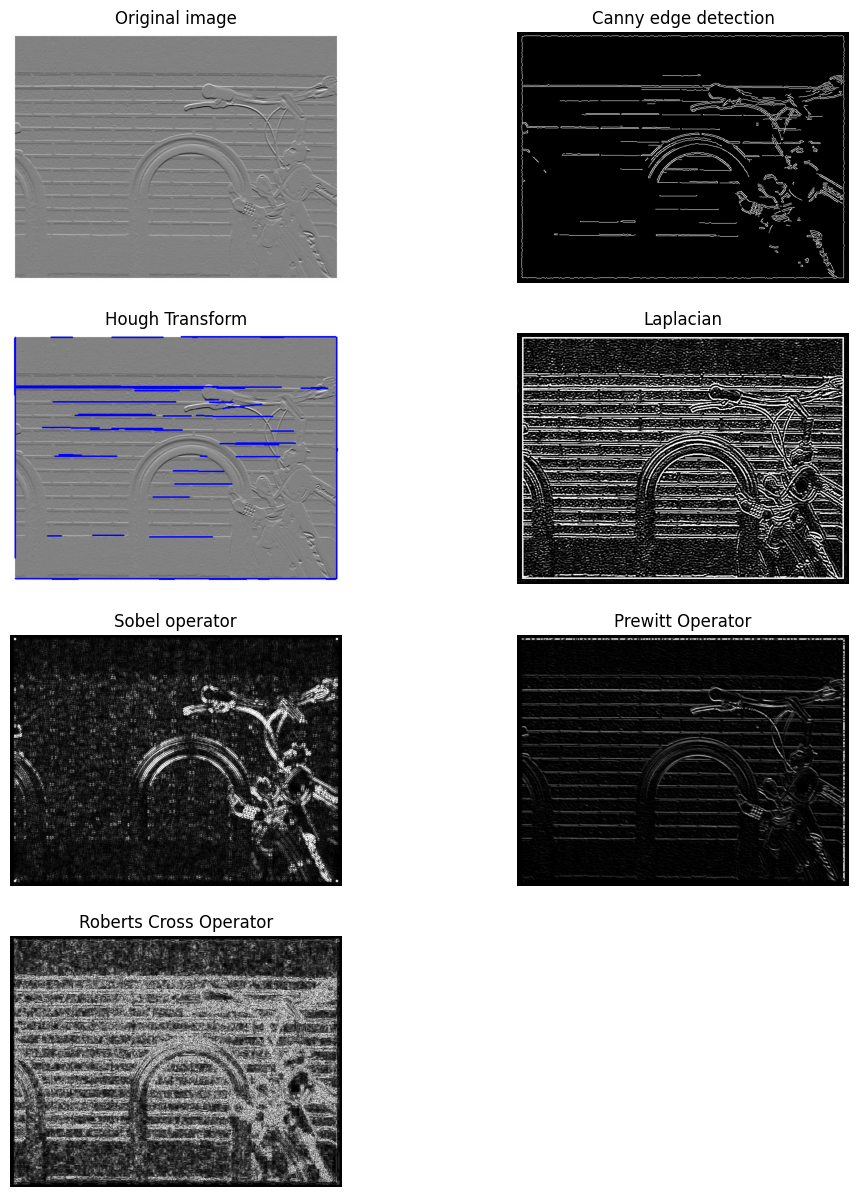

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
img = cv2.imread('1.jpg')
img1 = img

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

edges = cv2.Canny(image=img_blur, threshold1 = 75, threshold2=150)
plt.figure(figsize = (12,15))
plt.subplot(4,2,1)
plt.axis('off')
plt.title('Original image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


plt.subplot(4,2,2)
plt.axis('off')
plt.title('Canny edge detection')
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=5, maxLineGap=10)
for points in lines:
    x1,y1,x2,y2=points[0]
    cv2.line(img1,(x1,y1),(x2,y2),(255,0,0),2)


plt.subplot(4,2,3)
plt.axis('off')
plt.title('Hough Transform')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

Laplacian_edges = cv2.Laplacian(img_blur, -1, ksize=5, scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
plt.subplot(4,2,4)
plt.axis('off')
plt.title('Laplacian')
plt.imshow(cv2.cvtColor(Laplacian_edges, cv2.COLOR_BGR2RGB))


plt.subplot(4,2,5)
plt.axis('off')
plt.title('Sobel operator')
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
sobelxy_uint8 = cv2.convertScaleAbs(sobelxy)
plt.imshow(cv2.cvtColor(sobelxy_uint8, cv2.COLOR_BGR2RGB))

plt.subplot(4, 2, 6)
plt.axis('off')
plt.title('Prewitt Operator')
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
img_prewittx = cv2.filter2D(img_blur, -1, kernelx)
img_prewitty = cv2.filter2D(img_blur, -1, kernely)
Prewitt_edges = img_prewittx + img_prewitty
plt.imshow(Prewitt_edges, cmap='gray')

plt.subplot(4, 2, 7)
plt.axis('off')
roberts_cross_v = np.array([[1, 0], [0, -1]])
roberts_cross_h = np.array([[0, 1], [-1, 0]])
vertical = ndimage.convolve(img_gray, roberts_cross_v)
horizontal = ndimage.convolve(img_gray, roberts_cross_h)
Robert_edges = np.sqrt(np.square(horizontal) + np.square(vertical))
plt.imshow(Robert_edges, cmap='gray')
plt.title('Roberts Cross Operator')

In this question 1, Laplacian gives better result inspite of some noise in the image. Canny is also fine but it is giving broken edges

Question 2

Text(0.5, 1.0, 'Roberts Operator')

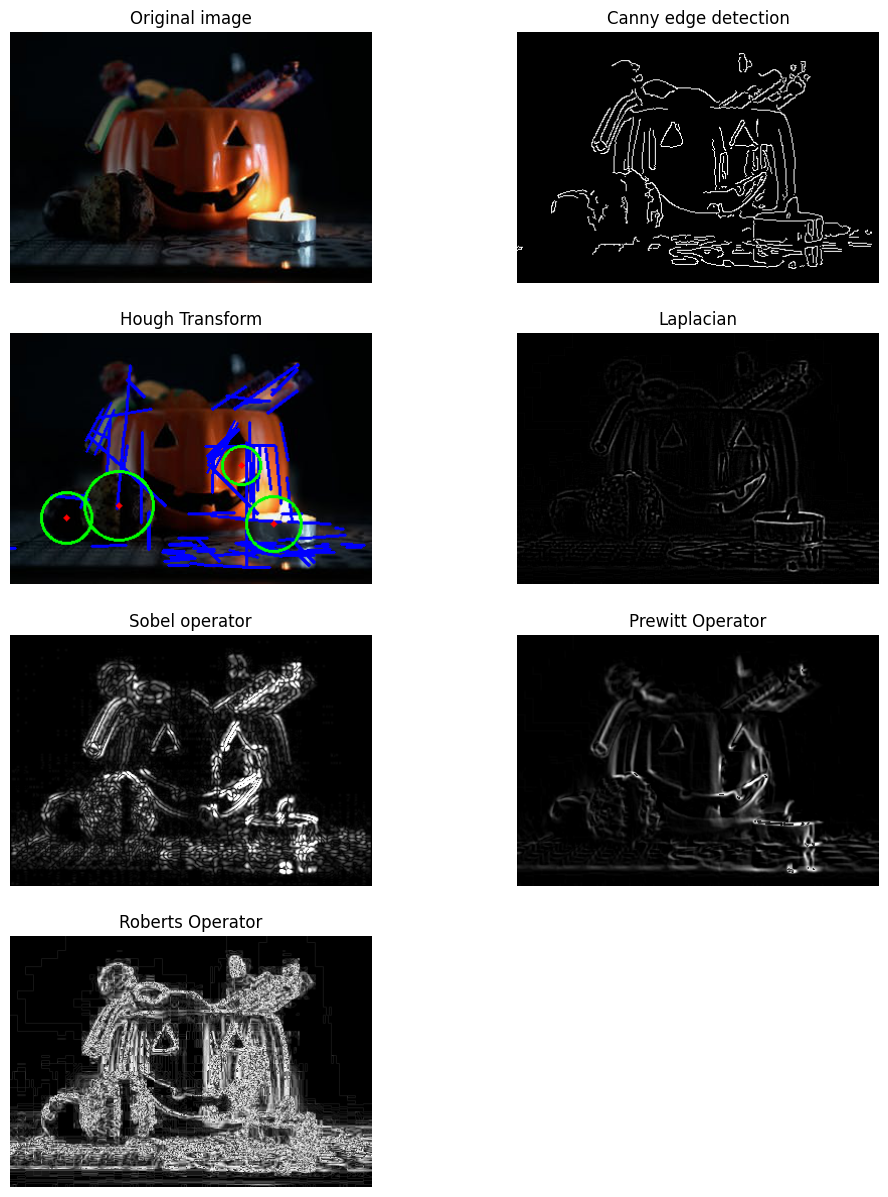

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
img = cv2.imread('2.jpeg')
img1 = img

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

edges = cv2.Canny(image=img_blur, threshold1 = 50, threshold2=100)
plt.figure(figsize = (12,15))
plt.subplot(4,2,1)
plt.axis('off')
plt.title('Original image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


plt.subplot(4,2,2)
plt.axis('off')
plt.title('Canny edge detection')
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold= 40, minLineLength=5, maxLineGap=10)
for points in lines:
    x1,y1,x2,y2=points[0]
    cv2.line(img1,(x1,y1),(x2,y2),(255,0,0),2)

detected_circles = cv2.HoughCircles(img_blur,cv2.HOUGH_GRADIENT, 1, 20, param1 = 25, param2 = 30, minRadius = 12, maxRadius = 40)
if detected_circles is not None:
  detected_circles = np.uint16(np.around(detected_circles))
  for pt in detected_circles[0, :]:
      a, b, r = pt[0], pt[1], pt[2]
      cv2.circle(img1, (a, b), r, (0, 255, 0), 2)
      cv2.circle(img1, (a, b), 1, (0, 0, 255), 3)
plt.subplot(4,2,3)
plt.axis('off')
plt.title('Hough Transform')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

Laplacian_edges = cv2.Laplacian(img_blur, -1, ksize=3, scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
plt.subplot(4,2,4)
plt.axis('off')
plt.title('Laplacian')
plt.imshow(cv2.cvtColor(Laplacian_edges, cv2.COLOR_BGR2RGB))


plt.subplot(4,2,5)
plt.axis('off')
plt.title('Sobel operator')
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
sobelxy_uint8 = cv2.convertScaleAbs(sobelxy)
plt.imshow(cv2.cvtColor(sobelxy_uint8, cv2.COLOR_BGR2RGB))

plt.subplot(4, 2, 6)
plt.axis('off')
plt.title('Prewitt Operator')
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
img_prewittx = cv2.filter2D(img_blur, -1, kernelx)
img_prewitty = cv2.filter2D(img_blur, -1, kernely)
Prewitt_edges = img_prewittx + img_prewitty
plt.imshow(Prewitt_edges, cmap='gray')

plt.subplot(4, 2, 7)
plt.axis('off')
roberts_v = np.array([[1, 0], [0, -1]])
roberts_h = np.array([[0, 1], [-1, 0]])
vertical = ndimage.convolve(img_gray, roberts_v)
horizontal = ndimage.convolve(img_gray, roberts_h)
Robert_edges = np.sqrt(np.square(horizontal) + np.square(vertical))
plt.imshow(Robert_edges, cmap='gray')
plt.title('Roberts Operator')

In this, Laplacian is best as can be seen from the output

Question 3

Text(0.5, 1.0, 'Roberts Cross Operator')

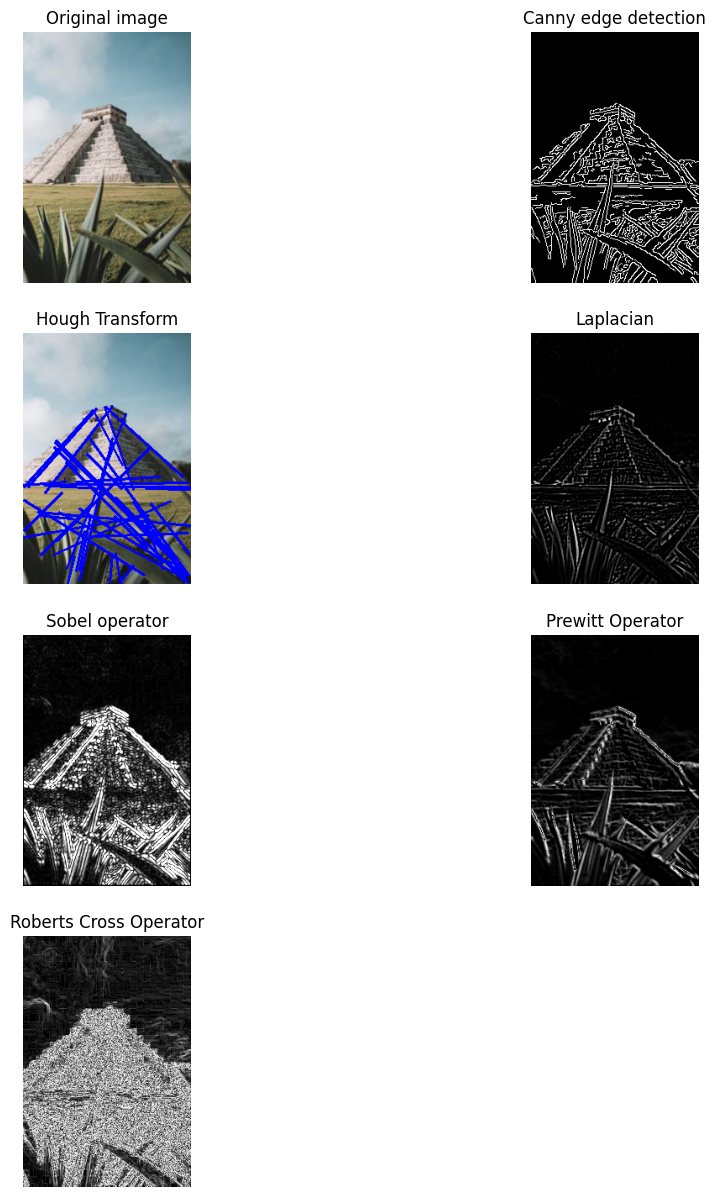

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
img = cv2.imread('3.jpeg')
img1 = img

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

edges = cv2.Canny(image=img_blur, threshold1 = 50, threshold2=100)
plt.figure(figsize = (12,15))
plt.subplot(4,2,1)
plt.axis('off')
plt.title('Original image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


plt.subplot(4,2,2)
plt.axis('off')
plt.title('Canny edge detection')
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold= 60, minLineLength= 20, maxLineGap=10)
for points in lines:
    x1,y1,x2,y2=points[0]
    cv2.line(img1,(x1,y1),(x2,y2),(255,0,0),2)


plt.subplot(4,2,3)
plt.axis('off')
plt.title('Hough Transform')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

Laplacian_edges = cv2.Laplacian(img_blur, -1, ksize=3, scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
plt.subplot(4,2,4)
plt.axis('off')
plt.title('Laplacian')
plt.imshow(cv2.cvtColor(Laplacian_edges, cv2.COLOR_BGR2RGB))


plt.subplot(4,2,5)
plt.axis('off')
plt.title('Sobel operator')
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
sobelxy_uint8 = cv2.convertScaleAbs(sobelxy)
plt.imshow(cv2.cvtColor(sobelxy_uint8, cv2.COLOR_BGR2RGB))

plt.subplot(4, 2, 6)
plt.axis('off')
plt.title('Prewitt Operator')
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
img_prewittx = cv2.filter2D(img_blur, -1, kernelx)
img_prewitty = cv2.filter2D(img_blur, -1, kernely)
Prewitt_edges = img_prewittx + img_prewitty
plt.imshow(Prewitt_edges, cmap='gray')

plt.subplot(4, 2, 7)
plt.axis('off')
roberts_cross_v = np.array([[1, 0], [0, -1]])
roberts_cross_h = np.array([[0, 1], [-1, 0]])
vertical = ndimage.convolve(img_gray, roberts_cross_v)
horizontal = ndimage.convolve(img_gray, roberts_cross_h)
Robert_edges = np.sqrt(np.square(horizontal) + np.square(vertical))
plt.imshow(Robert_edges, cmap='gray')
plt.title('Roberts Cross Operator')

Here also, Laplacian is good